In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_colwidth', None)

In [2]:
data_path = '../../data/data_generation_from_gpt/final_chat_gpt_data.txt'

# Read the data
with open(data_path, 'r') as file:
    lines = file.readlines()

# Initialize lists for structured data
speakers = []
messages = []

# Process each line
for line in lines:
    if line.strip():  # Ignore empty lines
        if line.startswith("<bot>"):
            speakers.append("bot")
            # Remove <bot> and <endOfText> tags
            messages.append(line.replace("<bot>", "").replace("<endOfText>", "").strip())
        elif line.startswith("<human>"):
            speakers.append("human")
            # Remove <human> and <endOfText> tags
            messages.append(line.replace("<human>", "").replace("<endOfText>", "").strip())

# Create a DataFrame
df = pd.DataFrame({'speaker': speakers, 'message': messages})

# Display the first few rows
print(df.head())

# Save to a CSV file
output_path = '/Users/sofiagermer/Desktop/SOFIA/IAS/WinterSemester_24_25/ml_proj/Project-ML/data/data_generation_from_gpt/final_chat_gpt_data.csv'
df.to_csv(output_path, index=False)

print(f"Data saved to {output_path}")

  speaker  \
0     bot   
1   human   
2     bot   
3   human   
4     bot   

                                                                                                                                                                                              message  
0  I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.  
1                                                                                                                                         That sounds magical! Fireworks create a special atmosphere.  
2                                                                                                                                                                 This was a best friend. I miss her.  
3                                                                                                                        

                                             |          | [  0%]   00:00 -> (? left)


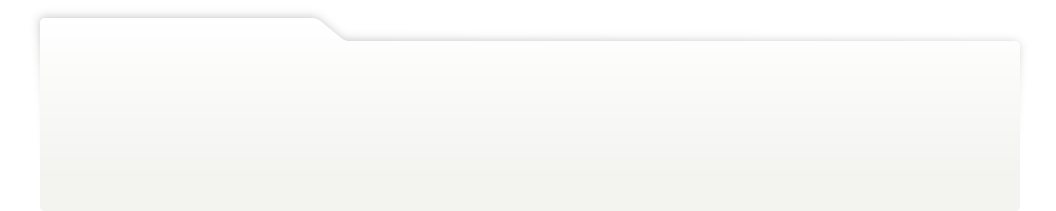
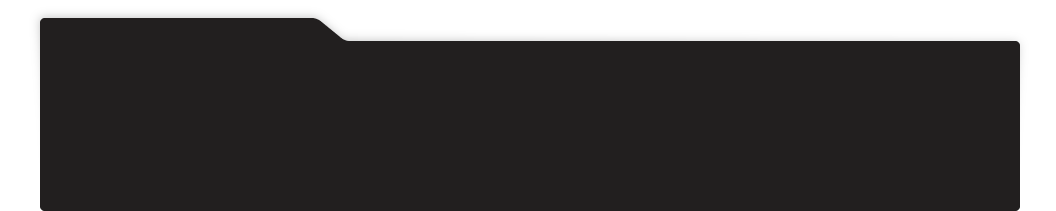
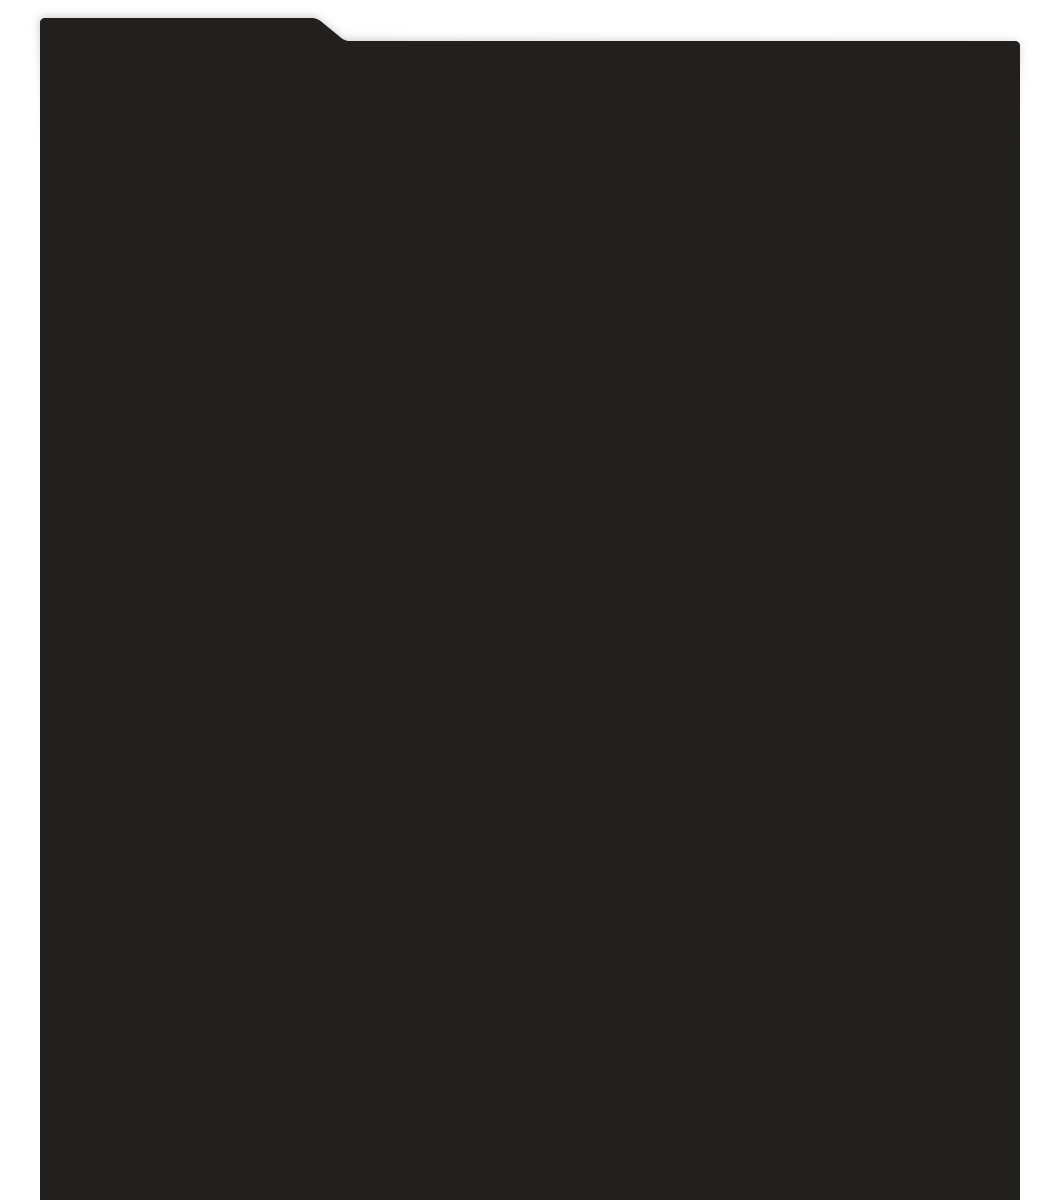
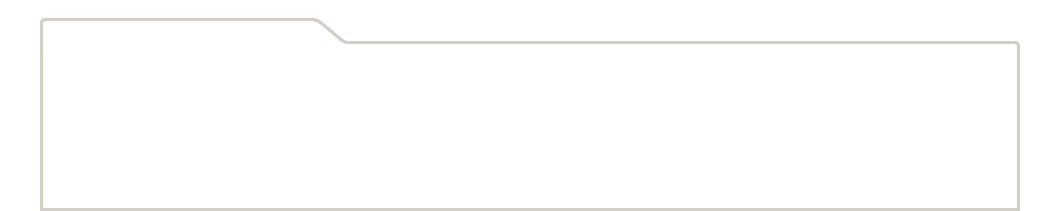
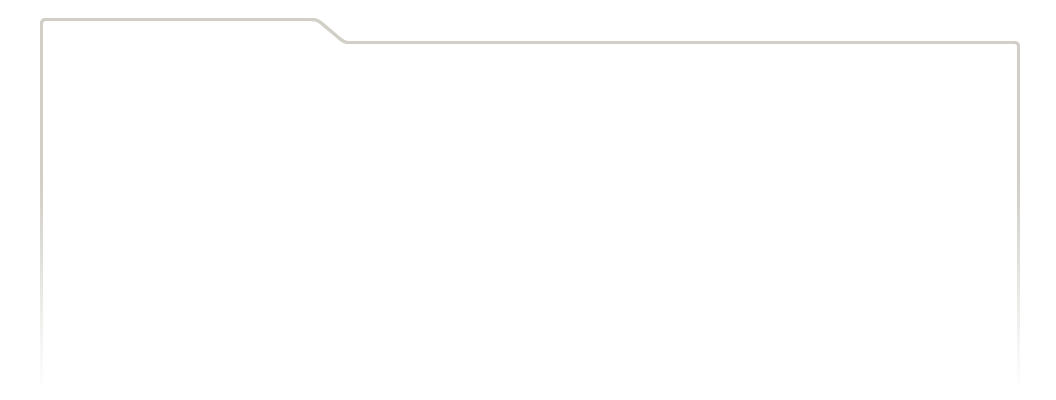
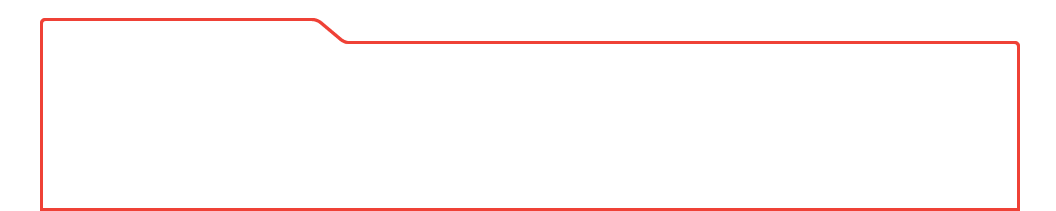
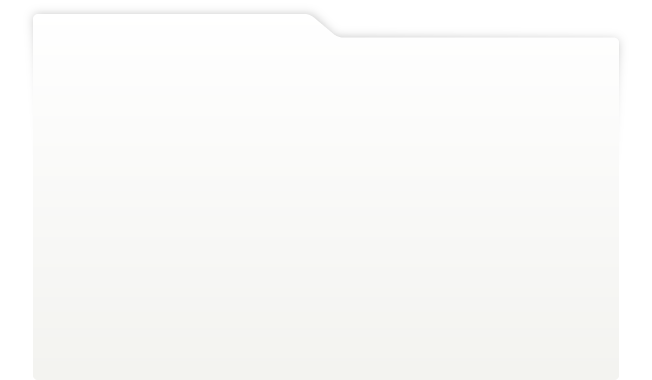
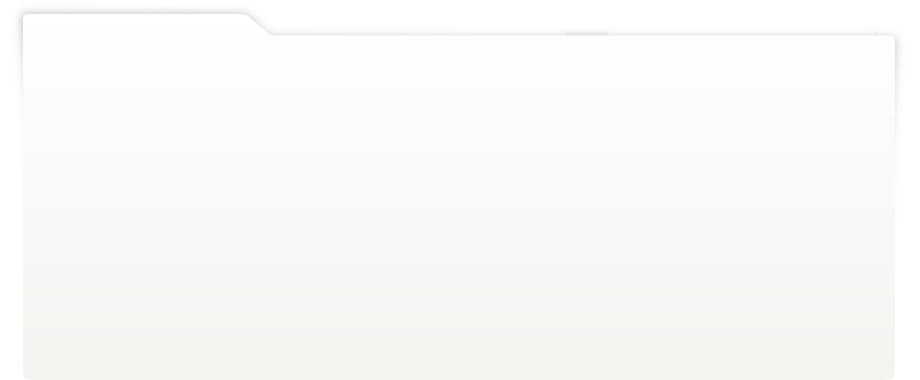
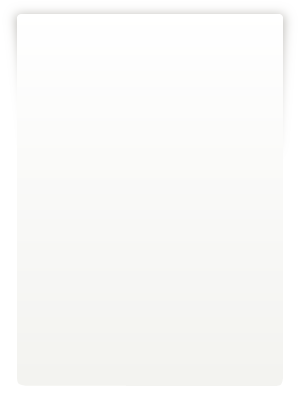
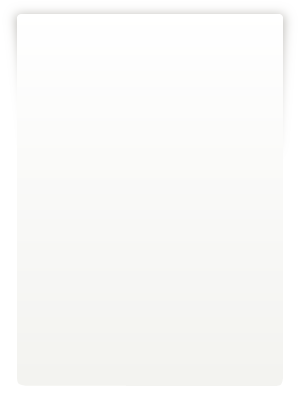
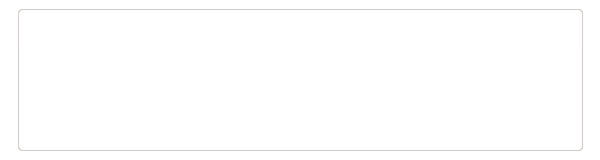
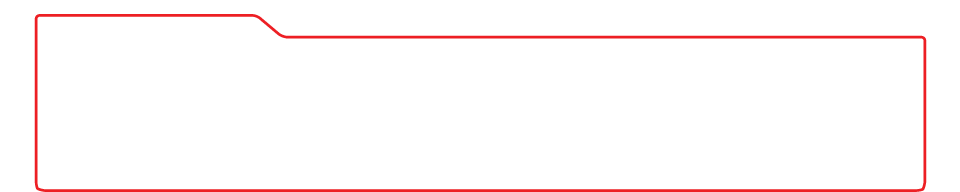
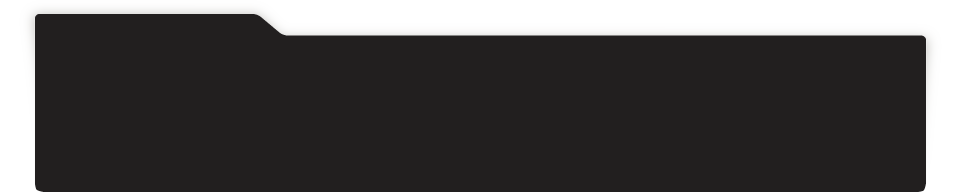
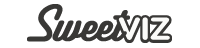
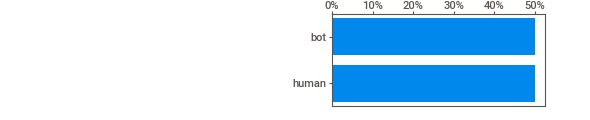
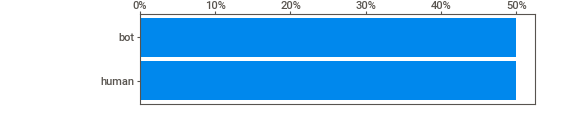
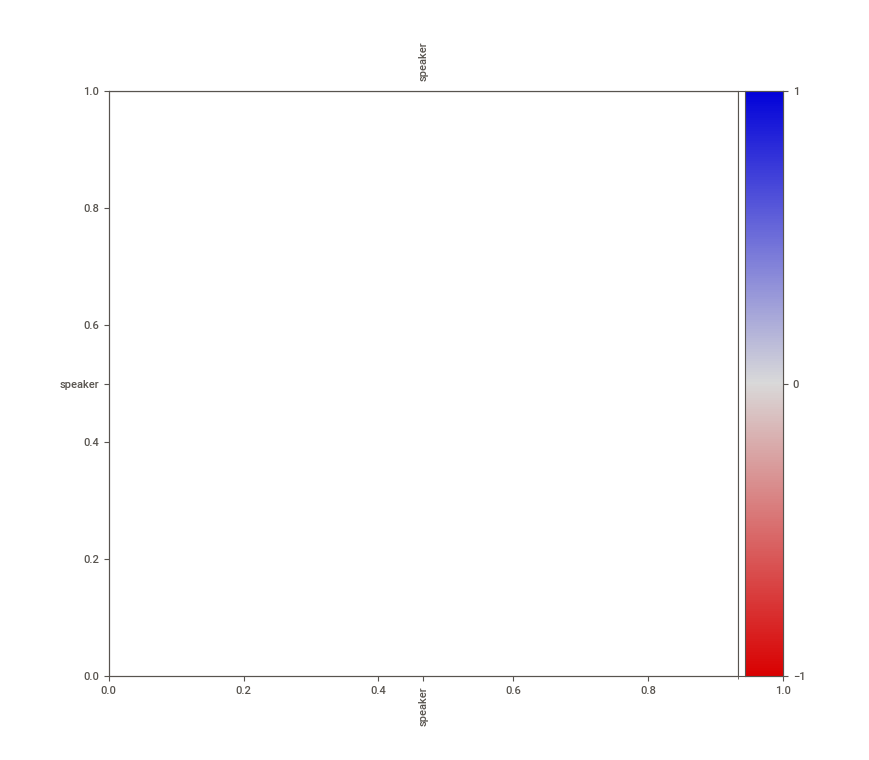
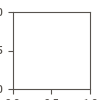

In [3]:
report = sv.analyze(df)
report.show_notebook()

## Visualization of length of the sentences

### Bot lines

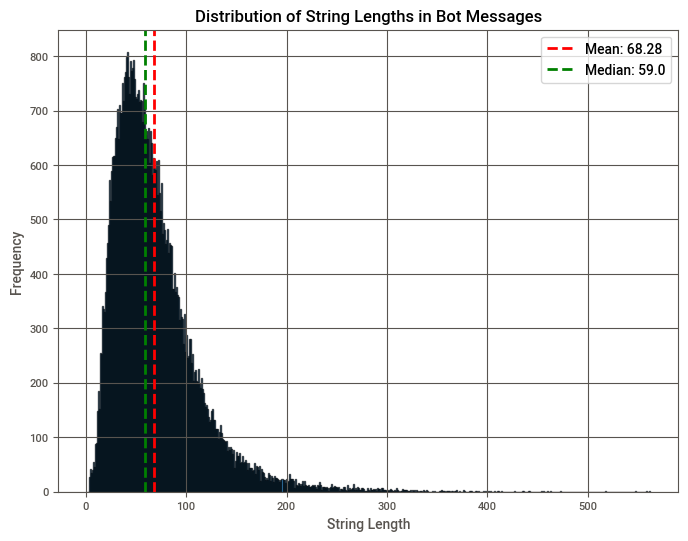

In [9]:
# Calculate the lengths of bot messages
df['len_bot'] = df.loc[df['speaker'] == 'bot', 'message'].str.len()

# Drop NaN values (non-bot rows)
bot_lengths = df['len_bot'].dropna()

# Calculate statistics
mean_length = bot_lengths.mean()
median_length = bot_lengths.median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(bot_lengths, bins=range(1, int(bot_lengths.max()) + 2), edgecolor='black', alpha=0.7)

# Add mean and median lines
plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

# Add titles and labels
plt.title("Distribution of String Lengths in Bot Messages")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

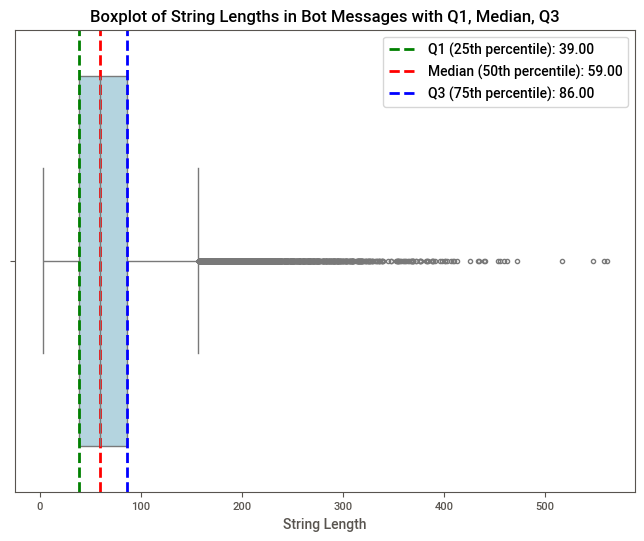

In [10]:

# Calculate the lengths of bot messages
df['len_bot'] = df.loc[df['speaker'] == 'bot', 'message'].str.len()

# Drop NaN values (non-bot rows)
bot_lengths = df['len_bot'].dropna()

# Calculate quartiles
Q1 = bot_lengths.quantile(0.25)
Q2 = bot_lengths.quantile(0.50)  # Median
Q3 = bot_lengths.quantile(0.75)

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=bot_lengths, color='lightblue')

# Add vertical lines for Q1, Median (Q2), and Q3
plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

# Add titles and labels
plt.title("Boxplot of String Lengths in Bot Messages with Q1, Median, Q3")
plt.xlabel("String Length")

# Add legend
plt.legend()

# Show the plot
plt.show()

## Vocabulary Analysis

### Vocabulary Size

In [8]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['message'])  # X is a sparse matrix of word counts

word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_frequencies = word_counts.sum(axis=0)
top_words = word_frequencies.sort_values(ascending=False).head(10)

# Print vocabulary size and top 10 words
vocab_size = len(vectorizer.vocabulary_)
print(f"Vocabulary size: {vocab_size}")
print("\nTop 10 most frequent words:")
print(top_words)

Vocabulary size: 18438

Top 10 most frequent words:
to      50453
it      44435
you     39726
that    39556
the     25385
and     22643
my      17901
was     15102
is      14621
for     14401
dtype: int64
